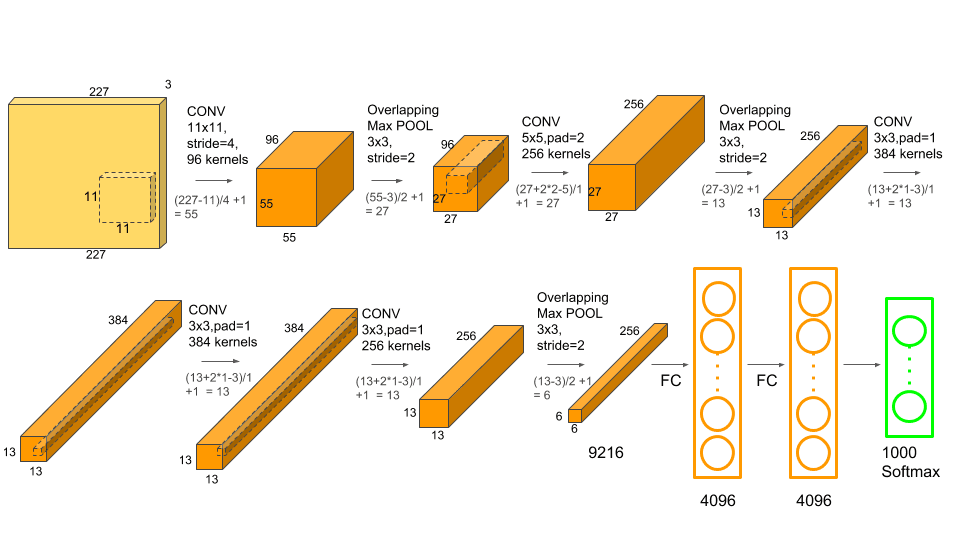

https://www.kaggle.com/code/blurredmachine/alexnet-architecture-a-complete-guide

In [3]:
!unzip '/content/drive/MyDrive/Computer_vision/Datasets/flowers_dataset.zip' -d './data'

Archive:  /content/drive/MyDrive/Computer_vision/Datasets/flowers_dataset.zip
 extracting: ./data/test/daisy/3699235066_fc09a02dfe_m_jpg.rf.083993c3ebd5cfdb89aef2abc23535fa.jpg  
 extracting: ./data/test/daisy/2579018590_74359dcf1a_m_jpg.rf.09c66018bd90f02891f966ce3d0c4c47.jpg  
 extracting: ./data/test/dandelion/3554435478_1a7ab743e9_n_jpg.rf.07d5667ff8bfd641e5004f6b2270d4b6.jpg  
 extracting: ./data/test/dandelion/34587720941_ccbbc420ec_n_jpg.rf.0adc605a005797e5ef3c26bd4c7078f9.jpg  
 extracting: ./data/test/daisy/22244161124_53e457bb66_n_jpg.rf.0647dd5bf7e8b1493bf4ab1aabe2df3e.jpg  
 extracting: ./data/test/daisy/6207492986_0ff91f3296_jpg.rf.03fc13bc6c049b950ab318b108e0283d.jpg  
 extracting: ./data/test/dandelion/8797114213_103535743c_m_jpg.rf.132646214f7e9bcbdda402ab688ca868.jpg  
 extracting: ./data/test/dandelion/2478018280_1be353ca8c_m_jpg.rf.13e686968dc86acd0a5922e50bf0c30d.jpg  
 extracting: ./data/test/daisy/8709535323_a6bea3e43f_jpg.rf.0811cb3a0ef1b6eed5a91fb6f31c9a01.jpg  

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, ReLU, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

## Data Augmentation and Load

In [4]:
train_dir = '/content/data/train'
test_dir = '/content/data/test'

In [5]:
# Data Augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.4,
    fill_mode='nearest',
    horizontal_flip=True
)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [6]:
# Data Load
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

Found 1275 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


In [7]:
print(train_data.class_indices)
print(test_data.class_indices)

{'daisy': 0, 'dandelion': 1}
{'daisy': 0, 'dandelion': 1}


In [ ]:
print(train_data.num_classes)

2


## Build AlexNet model

In [8]:
model = Sequential()

# Conv1
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

# Conv2
model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

# Conv3
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))

# Conv4
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))

# Conv5
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

# FC1
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# FC2
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(train_data.num_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 54, 54, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,756,610 (178.36 MB)

 Trainable params: 46,755,906 (178.36 MB)

 Non-trainable params: 704 (2.75 KB)

### Model compile and Train

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.Accuracy()])

history = model.fit(train_data,
                    epochs=10,
                    validation_data=test_data,
                    batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 287s 7s/step - accuracy: 0.0234 - loss: 6.0397 - val_accuracy: 0.0000e+00 - val_loss: 0.6813
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 278s 7s/step - accuracy: 0.0000e+00 - loss: 0.6772 - val_accuracy: 0.0000e+00 - val_loss: 0.6814
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 278s 7s/step - accuracy: 0.0000e+00 - loss: 0.6759 - val_accuracy: 0.0000e+00 - val_loss: 0.6816
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 271s 7s/step - accuracy: 0.0000e+00 - loss: 0.6824 - val_accuracy: 0.0000e+00 - val_loss: 0.6821
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 274s 7s/step - accuracy: 0.0000e+00 - loss: 0.6817 - val_accuracy: 0.0000e+00 - val_loss: 0.6821
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 268s 7s/step - accuracy: 0.0000e+00 - loss: 0.6795 - val_accuracy: 0.0000e+00 - val_loss: 0.6813
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 267s 7s/step - accuracy: 0.0000e+00 - loss: 0.6807 - val_accuracy: 0.0000e+00 - val_loss: 0.6814
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 267s 7s/step - accura

### Model Evaluation

In [ ]:
loss, acc = model.evaluate(test_data)
print(f'Test accuracy: {acc}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.0000e+00 - loss: 0.6828
Test accuracy: 0.0


### Model save

In [ ]:
model.save('/content/drive/MyDrive/Computer_vision/model/AlexNet_e10.keras')

# Inferencing and Prediction

In [27]:
# Load the trained model
loaded_model = keras.models.load_model('/content/drive/MyDrive/Computer_vision/model/AlexNet_e10.keras')

In [25]:
import numpy as np
from keras.preprocessing.image import img_to_array, load_img

In [26]:
def prediction(model, image_path, class_names):
  img = load_img(image_path, target_size=(224, 224))
  img_arr = img_to_array(img) / 255.0 # Normalize the image
  img_arr = np.expand_dims(img_arr, axis=0)

  pred = model.predict(img_arr)
  class_indx = np.argmax(pred[0])
  label = class_name[class_indx]

  return label

In [35]:
class_name = ['daisy', 'dandelion']
img_path = '/content/data/test/daisy/12193032636_b50ae7db35_n_jpg.rf.e6c4eeb71c56e793a0d85f6d979dbe20.jpg'
result = prediction(loaded_model, img_path, class_name)

print(f'The image of : {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
The image of : dandelion
